[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gvarnavi/generative-art-iap/blob/master/Tutorials/00_python-tutorial-py.ipynb)

# Python Tutorial
Here we will cover some programming basics in Python that will be useful throughout the workshop.
### **Working in a Jupyter notebook**
During this workshop, we'll be demoing code examples using a Jupyter notebook environment. To run a code cell in the notebook, first select the code cell anywhere with your cursor. You may execute the cell by using the keyboard shortcut Shift+Enter or Command+Enter.
Test running the following cell:

In [1]:
pi = 22/7
print("{} is an approximation for pi.".format(pi))

### **A quick note about notebooks**
Notebooks are a useful way to organize and annotate code especially for demos, support $\LaTeX$ for writing mathematical expressions, and allow code to be executed in smaller blocks (cells) that can help to simplify a large program. However, there are a couple of important points to keep in mind:
- The block structure allows code to be run out of order, so be careful that you've executed your cells in order from top to bottom.
- ***Jupyter notebook remembers your history of running code, even after you delete the code.*** Variables, objects, and functions you define persist throughout your notebook while your session is active, even if you delete the cell(s) that defined them. If you want to delete or rename a variable, make sure you update its occurrences throughout the notebook. You can restart your runtime (go to Kernel -> Restart at the top menu) and run all cells to check for any undefined variables.
- Finally, if you open a notebook from Github using the "Open in Colab" link, it will create a copy for you to edit. Make sure you ***save your notebook to your Google Drive***, or download to your computer if you prefer, to ensure your work is saved!

### **Python syntax**
Let's start by reviewing fundamentals of Python syntax.
Below are examples of defining variables, composing basic mathematical operations, and printing values:

In [2]:
x = 9; y = 7
x += y           # modify x in place, same as x=x+y. 
print(x)

p = x / y        # regular floating point division.
q = x // y       # integer division: result is rounded down to the closest integer. 
print(p, q)

a = x**2         # raising to a power is performed by **, rather than ^
b = x**-0.25
print(a, b)

### **Lists, loops, and iteration**
Lists are a general ordered set whose entries can store values, strings, other lists, objects, etc., and are defined using brackets ```[]```. Lists **do not** always behave the same way as ```numpy``` arrays (which we will get to later) and do not follow the same conventions with algebraic operations.

In [3]:
list1 = [1, 4]
list2 = [9, 16, 25]
sq = list1 + list2      # Addition concatenates lists together
sq2 = 2*sq              # Multiplication multiplies the list length, not the values stored!
print(sq)
print(sq2)

# add the squares using sum:
sum_sq = sum(sq)
print("Sum of squares: {}".format(sum_sq))

# sort using sorted:
sort_sq = sorted(sq2)
print("Sorted double squares: {}".format(sort_sq))

***Python indexing starts from 0, and the last valid index for a list or array of length $N$ is ```N-1```.*** In addition, Python supports negative indexing, so that the index ```-1``` returns the last entry of the list, ```-2``` the second to last, and so on.

A slice of a list or array is specified by colon-separated values as ```start:stop:skip```. Starting at zero, stopping at the end, and skipping by 1 are implied if any of these values is omitted, as shown in the examples below.

In [4]:
#remember our list, sq2, is [1, 4, 9, 16, 25, 1, 4, 9, 16, 25]

first = sq2[0]         # Zero indexes the first entry.
last = sq2[len(sq2)-1] # The last index is the length of the list minus 1.
last = sq2[-1]         # Or, we can use negative indexing, which starts from the end.

sl = sq2[3:6] # An interior slice. Slicing is exclusive of the last index, but it
             # allows us to easily calculate the number of entries in the slice.
             # Here, we include entries with indices 3,4,5, for a total of (6-3)=3.
             
f5 = sq2[:5]  # First five elements, which has index 0,1,2,3,4
l3 = sq[-3:]  # Last three elements, which has index N-3,N-2,N-1

a = sq2[:]   # All
e2 = sq2[::2] # Every two
al = sq2[:-1] # All but the last

print("First:", first)
print("Last:", last)
print("First five:", f5)
print("Last three:", l3)
print("Interior slice:", sl)
print("All:", a)
print("Every two:", e2)
print("All but last:", al)

How could we use slicing to quickly reverse the order of a list?

In [5]:
#remember our list, sq2, is [1, 4, 9, 16, 25, 1, 4, 9, 16, 25]
sq2r = sq2[::-1]
print(sq2r)

***A ```for``` loop can be used to iterate over values in a list.*** The syntax is ```for <iterator> in <sequence>:``` followed by an indented line below. There are a few different ways to iterate:

In [6]:
#remember our list, sq, is [1, 4, 9, 16, 25]

# range(N) for integer N generates a sequence 0, 1, ... N-1 for our iterator
# i to take on. More generally, you can specify range(start, stop).
for i in range(len(sq)): 
    print(i, sq[i])

# Lists are sequences, so our iterator can take on the list values
# directly. But, we do not have a counter.
for square in sq:
    print("The square is {}".format(square))

# Use enumerate to advance both a counter i and an iterator.
for i,square in enumerate(sq):
    print("{} squared is {}".format(i+1,square))

Loops provide a quick way to create lists as well using list comprehension:

In [7]:
sq = [i**2 for i in range(1,6)] #i would be iterated through 1,2,3,4,5. 
print(sq)

### **Functions and conditionals**
Functions are defined using the syntax ```def```, and one or more values can be returned via ```return```. The function name and arguments are followed by a colon, and the function definition should be indented.

Conditional statements ```if```, ```elif```, and ```else``` are also followed by a colon, and the line below should be indented. Indentation matters!

In [8]:
# return whether a number is positive, negative, or zero.
def sign(a):
    if a>0:
        return 'positive'
    elif a<0:
        return 'negative'
    else:
        return 'zero'

# test:
x = 5
print("{} is {}.".format(x, sign(x)))
y = -2.7
print("{} is {}.".format(y, sign(y)))
z = 0
print("{} is {}.".format(z, sign(z)))

5 is positive.
-2.7 is negative.
0 is zero.


### **Scientific computing with ```numpy```**
Matrices and linear algebra make up a significant part of scientific computing. ```Numpy``` is a fundamental Python library for such computations. We will use it to work efficiently with arrays and matrices, generate random numbers, and have access to common trigonometric functions and special constants. Let's look at a few simple examples.

In [9]:
import numpy as np # import numpy library and give it an alias (short name)

# create a 1-D array of zeros of length n. By default, the values are considered floats.
n = 5
x = np.zeros(n)

# create a 1-D array of ones, of integer type:
y = np.ones(n, dtype=np.int)

# create n evenly-spaced values on [a,b], inclusive of endpoints:
a = 1; b = 5
s = np.linspace(a, b, n)

# seed the random number generator, for reproducible results,
# then create an array of random numbers.
np.random.seed(12) 
r = np.random.random(n) # generate n random numbers on the interval [0,1).

# use trig functions and built in pi.
t = np.cos(4*np.pi*r)

print("Zeros:", x)
print("Ones:", y)
print("Evenly spaced:", s)
print("Random:", r)
print("Trig:", t)

Zeros: [0. 0. 0. 0. 0.]
Ones: [1 1 1 1 1]
Evenly spaced: [1. 2. 3. 4. 5.]
Random: [0.15416284 0.7400497  0.26331502 0.53373939 0.01457496]
Trig: [-0.35832308 -0.99219278 -0.9860344   0.91145812  0.98327407]


The following are commonly used attributes of ```numpy``` arrays. Notice the distinction between the shapes of a 1-dimensional array, and a 2-dimensional array with a single column. The difference is important when trying to perform certain operations on matrices which require the dimensions to match.

In [10]:
# Access the number of dimensions with .ndim:
x = np.zeros(3); y = np.zeros((3,1)); z = np.zeros((3,3))
print("x is {:d} dimensional; y is {:d} dimensional; z is {:d} dimensional.".format(x.ndim, y.ndim, z.ndim))

# Access the size of each dimension with .shape:
print("x has shape {}; y has shape {}; z has shape {}.".format(x.shape, y.shape, z.shape))

# We can reshape x to be 2-dimensional. Here, we specify that we want one column,
# and indicate -1 for the number of rows, which is interpreted as whatever the
# number of rows needs to be in order for x to have a single column.
x = x.reshape((-1,1))
print("x now has shape {}.".format(x.shape))

x is 1 dimensional; y is 2 dimensional; z is 2 dimensional.
x has shape (3,); y has shape (3, 1); z has shape (3, 3).
x now has shape (3, 1).


### **Matrix Operations**
The standard addition/subtraction, multiplication/division operators act *element-wise* on matrices. Traditional matrix-matrix or matrix-vector multiplication can be performed via ```numpy.dot```. 

In [11]:
x = 2*np.ones((2,2)); y = 3*np.ones((2,2))
print("x =\n",x)
print("y =\n",y)
print("x + y =\n",x + y)
print("x * y =\n",x * y) # note: element-wise multiplication
print("np.dot(x, y) =\n",np.dot(x, y)) # note: common matrix multiplication

x =
 [[2. 2.]
 [2. 2.]]
y =
 [[3. 3.]
 [3. 3.]]
x + y =
 [[5. 5.]
 [5. 5.]]
x * y =
 [[6. 6.]
 [6. 6.]]
np.dot(x, y) =
 [[12. 12.]
 [12. 12.]]


In [12]:
# Don't confuse lists and arrays!
a = [1]
print(5*a)
a = np.array([1])
print(5*a)

[1, 1, 1, 1, 1]
[5]


### **Plotting**
The ```matplotlib``` library provides tools for plotting data, and we import the module ```pyplot``` under the alias ```plt``` for short. Specific to notebooks, in order to display our plots inline, we also need to add a "magic" command ```%matplotlib inline```.

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

Let's generate and plot some example curves.

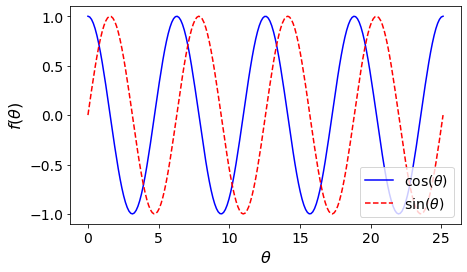

In [14]:
theta = np.linspace(0, 8*np.pi, 200) # 200 evenly-spaced values on [0, 8*pi]
cos = np.cos(theta)
sin = np.sin(theta)

# create a figure with a single subplot. ax is the axis object.
fig, ax = plt.subplots(1,1, figsize=(7,4))
ax.plot(theta, cos, color='b', label='$\cos(\\theta)$') # Can use Latex-style math mode for labels (though there are some differences).
ax.plot(theta, sin, color='r', label='$\sin(\\theta)$', linestyle='dashed') # Here we also changed the linestyle.

ax.set_xlabel("$\\theta$", size=16)
ax.set_ylabel("$f(\\theta)$", size=16)
ax.tick_params(labelsize=14) # increase tick label size

ax.legend(loc='lower right', fontsize=14)
plt.show() # display the plot

We can also visualize 2-D arrays as images:

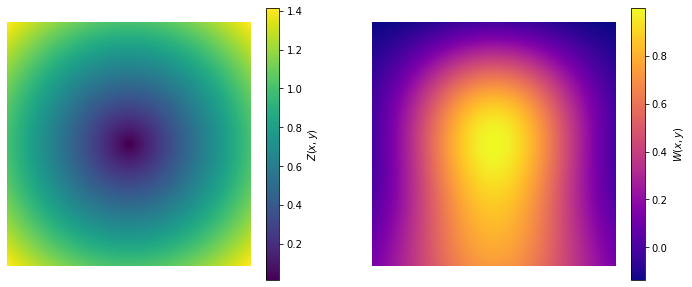

In [15]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y) # a meshgrid tiles the 1-D x array into a 2-D array of identical rows,
                         # and tiles the 1-D y array into a 2-D array of identical columns,
                         # producing 2 matrices which store the x and y coordinates, respectively,
                         # for the entire grid.

# Evaluate two different functions on the 2D grid. Each of the operations below
# act element-wise on the matrix entries of X and Y.
Z = np.sqrt(X**2 + Y**2)
W = (1 - (X**2 + Y**3))*np.exp(-(X**2 + Y**2))

# Create two plots side by side on the same figure.
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
im1 = ax1.imshow(Z, cmap=plt.cm.viridis) # specify a named colormap (see https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html)
ax1.axis('off')                          # turn off axis markings

# add a colorbar, specifying to which object colors correspond, and
# next to which axes it should be placed.
cbar1 = fig.colorbar(im1, ax=ax1)
cbar1.set_label('$Z(x,y)$')

# the default origin for imshow is in the *upper* left, as matrix column index increases going down,
# but we can set it to lower left to reflect that our y values increase going up.
im2 = ax2.imshow(W, cmap=plt.cm.plasma, origin='lower')
ax2.axis('off')
cbar2 = fig.colorbar(im2, ax=ax2)
cbar2.set_label('$W(x,y)$')

plt.show()

### Solving systems of ODES
Many of the interesting systems we'll explore, such as strange attractors, reaction-diffusion systems, etc., are solutions to continuous differential equations. We will use **```solve_ivp```** (initial value problem) from scipy library to integrate single equations or systems of ordinary differential equations.

In [16]:
from scipy.integrate import solve_ivp

Here, we will demonstrate solving the ODE system
$$
    \begin{align}
    \frac{dx}{dt} &= a\sin(\pi t) \\
    \frac{dy}{dt} &= bx + ct
    \end{align}
$$

First, we define a function that takes $t$, $(x,y)$, and any model parameters $(a,b,c)$ as input, and returns the derivatives, $(dx/dt,dy/dt)$. The following is syntax for defining a function:

In [17]:
# Define derivative function
def fun(t, q, a, b, c):
    x = q[0]; y = q[1]          # unpack our two variables
    dxdt = a*np.sin(np.pi*t)
    dydt = b*x + c*t
    return [dxdt, dydt]

Now let's integrate our ODE from $t=0$ to $t=5$. The solver uses adaptive time steps to achieve a desired integration accuracy, so we will ask the solver to interpolate our solution at 200 evenly spaced time points.

In [18]:
ti = 0; tf = 5
t_span = [ti, tf]                      # We will integrate from t=0 to t=5.
t_eval = np.linspace(ti, tf, 200)      # Generate 200 evenly spaced values of t at which to output solution.

a = -1; b = -2; c = 0.5                # define extra parameters.
q0 = [1, -1]                           # set initial conditions in the format (x0, y0).

# plug in all our inputs to solve_ivp and integrate.
sol = solve_ivp(lambda t, q: fun(t,q,a,b,c), t_span, q0, t_eval=t_eval)

The solve_ivp routine returns an object with the following fields:

In [19]:
sol.t   # The time points at which the solution is evaluated (same as t_eval)
sol.y   # The solution at all requested time points.
        # The shape is (number of variables, number of time points) = (2,200) here.

x_pts = sol.y[0,:]  # extract all the x-components
y_pts = sol.y[1,:]  # extract all the y-components

Finally we plot the solutions over time:

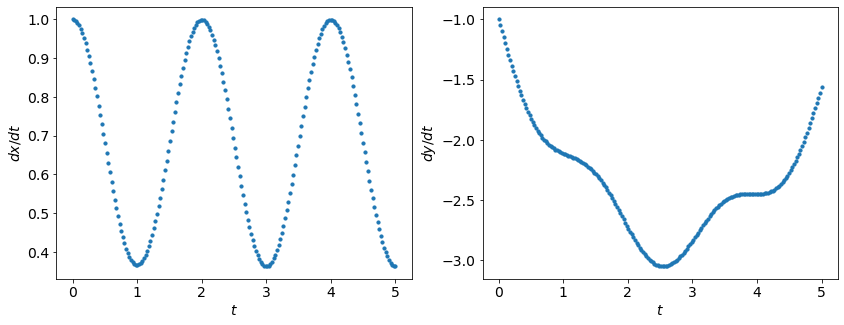

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5)) # initialize two figure axes side by side.
ax1.scatter(sol.t, x_pts, s=10)  # adjust the size of the scatter points.
ax2.scatter(sol.t, y_pts, s=10)

ax1.set_xlabel('$t$', size=14)
ax1.set_ylabel('$dx/dt$', size=14)
ax1.tick_params(labelsize=14)
ax2.set_xlabel('$t$', size=14)
ax2.set_ylabel('$dy/dt$', size=14)
ax2.tick_params(labelsize=14)
plt.show()